# Pipeline Speed Test

In [1]:
import sys
sys.path.insert(0, '..')
import time

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from lib.segmentation import segmentation_adjacency, FormFeatureExtraction
from lib.graph import coarsen_adj, perm_features

def pipeline(image, segmentation_algorithm):
    t_segmentation = time.process_time()
    segmentation = segmentation_algorithm(image)
    t_segmentation = time.process_time() - t_segmentation
    
    t_adjacency = time.process_time()
    adj, points, mass = segmentation_adjacency(segmentation)
    t_adjacency = time.process_time() - t_adjacency
    
    t_coarsen = time.process_time() 
    adjs_dist, adjs_rad, perm = coarsen_adj(adj, points, mass, levels=4)
    t_coarsen = time.process_time() - t_coarsen
    
    t_features = time.process_time()
    features = FormFeatureExtraction(segmentation).get_features()
    t_features = time.process_time() - t_features
    
    t_perm = time.process_time()
    features = perm_features(features, perm)
    t_perm = time.process_time() - t_perm
    
    t_all = t_segmentation + t_adjacency + t_coarsen + t_features + t_perm
    
    p_segmentation = 100 * t_segmentation / t_all
    p_adjacency = 100 * t_adjacency / t_all
    p_coarsen = 100 * t_coarsen / t_all
    p_features = 100 * t_features / t_all
    p_perm = 100 * t_perm / t_all
    
    print('Number of nodes: {}'.format(features.shape[0]))
    print('Execution time: {:.5f}s'.format(t_all))
    print('0. Segmentation: {:.5f}s, {:.2f}%'.format(t_segmentation, p_segmentation))
    print('1. Adjacency generation: {:.5f}s, {:.2f}%'.format(t_adjacency, p_adjacency))
    print('2. Coarsening: {:.5f}s, {:.2f}%'.format(t_coarsen, p_coarsen))
    print('3. Feature extraction: {:.5f}s, {:.2f}%'.format(t_features, p_features))
    print('4. Feature permutation: {:.5f}s, {:.2f}%'.format(t_perm, p_perm))
    
    plt.bar(range(5), [p_segmentation, p_adjacency, p_coarsen, p_features, p_perm], color="black")
    plt.ylabel('Percentage')

## Load datasets

In [3]:
from lib.datasets import MNIST, Cifar10, PascalVOC

mnist = MNIST('../data/mnist').test.next_batch(1, shuffle=False)[0][0]
cifar_10 = Cifar10('../data/cifar_10').test.next_batch(2, shuffle=False)[0][1]
pascal_voc = PascalVOC('../test_data').test.next_batch(3, shuffle=False)[0][2]

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
from lib.segmentation import slic_fixed, quickshift_fixed

## MNIST SLIC

Number of nodes: 80
Execution time: 0.02251s
0. Segmentation: 0.00743s, 32.99%
1. Adjacency generation: 0.00132s, 5.87%
2. Coarsening: 0.01057s, 46.94%
3. Feature extraction: 0.00316s, 14.04%
4. Feature permutation: 0.00003s, 0.15%


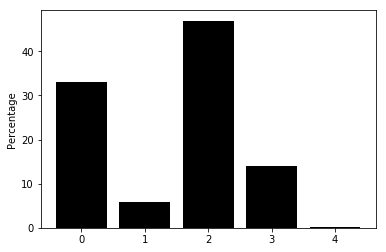

In [5]:
slic = slic_fixed(num_segments=100, compactness=5, max_iterations=10, sigma=0)
pipeline(mnist, slic)

## MNIST Quickshift

Number of nodes: 96
Execution time: 0.02585s
0. Segmentation: 0.01257s, 48.63%
1. Adjacency generation: 0.00063s, 2.44%
2. Coarsening: 0.01010s, 39.08%
3. Feature extraction: 0.00251s, 9.72%
4. Feature permutation: 0.00004s, 0.14%


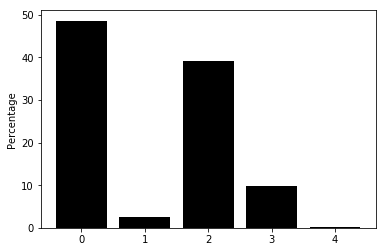

In [6]:
quickshift = quickshift_fixed(ratio=1, kernel_size=2, max_dist=2, sigma=0)
pipeline(mnist, quickshift)

## Cifar10 SLIC

Number of nodes: 160
Execution time: 0.01984s
0. Segmentation: 0.00435s, 21.94%
1. Adjacency generation: 0.00066s, 3.30%
2. Coarsening: 0.01223s, 61.63%
3. Feature extraction: 0.00256s, 12.92%
4. Feature permutation: 0.00004s, 0.20%


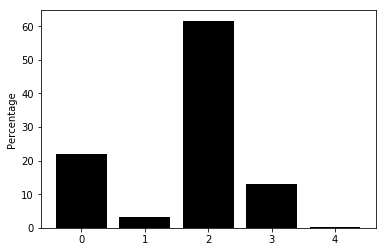

In [7]:
slic = slic_fixed(num_segments=150, compactness=5, max_iterations=10, sigma=0)
pipeline(cifar_10, slic)

## Cifar10 Quickshift

Number of nodes: 208
Execution time: 0.02616s
0. Segmentation: 0.00844s, 32.27%
1. Adjacency generation: 0.00073s, 2.80%
2. Coarsening: 0.01399s, 53.46%
3. Feature extraction: 0.00295s, 11.28%
4. Feature permutation: 0.00005s, 0.19%


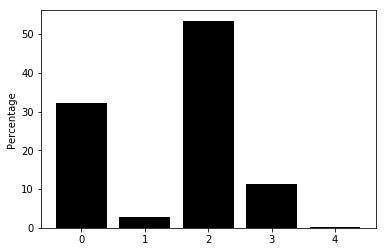

In [8]:
quickshift = quickshift_fixed(ratio=1, kernel_size=1, max_dist=5, sigma=0)
pipeline(cifar_10, quickshift)

## PascalVOC SLIC

Number of nodes: 960
Execution time: 0.33993s
0. Segmentation: 0.24683s, 72.61%
1. Adjacency generation: 0.01428s, 4.20%
2. Coarsening: 0.03360s, 9.88%
3. Feature extraction: 0.04512s, 13.27%
4. Feature permutation: 0.00010s, 0.03%


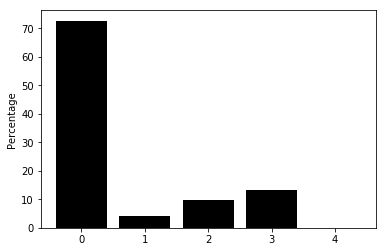

In [9]:
slic = slic_fixed(num_segments=800, compactness=30, max_iterations=10, sigma=0)
pipeline(pascal_voc, slic)

## PascalVOC Quickshift

Number of nodes: 576
Execution time: 1.47098s
0. Segmentation: 1.39626s, 94.92%
1. Adjacency generation: 0.01168s, 0.79%
2. Coarsening: 0.02780s, 1.89%
3. Feature extraction: 0.03517s, 2.39%
4. Feature permutation: 0.00007s, 0.00%


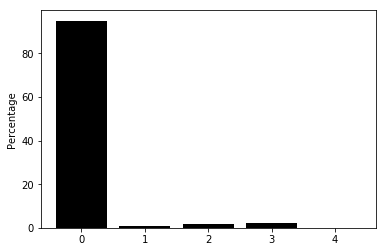

In [10]:
quickshift = quickshift_fixed(ratio=1, kernel_size=3, max_dist=15, sigma=0)
pipeline(pascal_voc, quickshift)